<a href="https://colab.research.google.com/github/Saniya-BZ/Feynn_labs_p1/blob/main/McDonaldsipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



#1. Import Libraries



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import LabelEncoder
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist
from sklearn.ensemble import RandomForestClassifier
from statsmodels.graphics.mosaicplot import mosaic

#2. Load Data

In [2]:
mcdonalds = pd.read_csv('mcdonalds.csv')

In [3]:
mcdonalds.head()

yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   
3   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No      No   
4    No        Yes    No       Yes    Yes  Yes   Yes    No        No     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  
3        Yes   +4   69         Once a week  Female  
4         No   +2   49        Once a month    Male

In [4]:
np.shape(mcdonalds)

(1453, 15)

In [5]:
mcdonalds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [6]:
mcdonalds.describe()

Age
count  1453.000000
mean     44.604955
std      14.221178
min      18.000000
25%      33.000000
50%      45.000000
75%      57.000000
max      71.000000

#3. Explore Data

In [7]:
print(mcdonalds.columns)
print(mcdonalds.shape)
print(mcdonalds.head(3))

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')
(1453, 15)
  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


#4. Data Preparation

In [8]:
# Convert Yes/No to 1/0
MD_x = mcdonalds.iloc[:, 0:11].applymap(lambda x: 1 if x == 'Yes' else 0)

<ipython-input-8-1b110419bbda>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  MD_x = mcdonalds.iloc[:, 0:11].applymap(lambda x: 1 if x == 'Yes' else 0)


#5. PCA

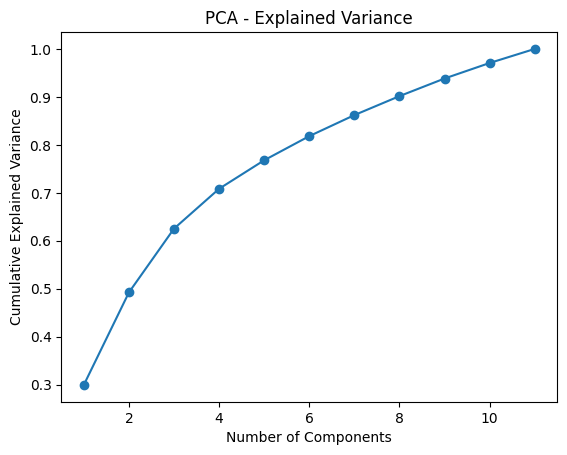

In [9]:
pca = PCA()
MD_pca = pca.fit_transform(MD_x)
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot explained variance
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Explained Variance')
plt.show()

#6. K-Means Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


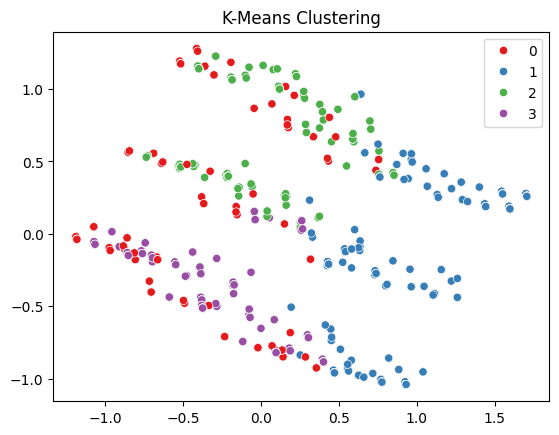

In [10]:
# Standardize the data
scaler = StandardScaler()
MD_x_scaled = scaler.fit_transform(MD_x)

# K-Means clustering
best_k = 4  # Determined from plots and analysis
kmeans = KMeans(n_clusters=best_k, random_state=1234)
clusters = kmeans.fit_predict(MD_x_scaled)

# Plot K-Means results
sns.scatterplot(x=MD_pca[:, 0], y=MD_pca[:, 1], hue=clusters, palette='Set1')
plt.title('K-Means Clustering')
plt.show()

# 7. Gaussian Mixture Model (GMM)

In [11]:
gmm = GaussianMixture(n_components=best_k, random_state=1234)
gmm_clusters = gmm.fit_predict(MD_x_scaled)

# Compare clustering results
pd.crosstab(clusters, gmm_clusters, rownames=['KMeans'], colnames=['GMM'])

GMM       0    1   2    3
KMeans                   
0       111   12   4   48
1         0  110  34  216
2       222    5  18   73
3       346    7   5  242

#8. Hierarchical Clustering

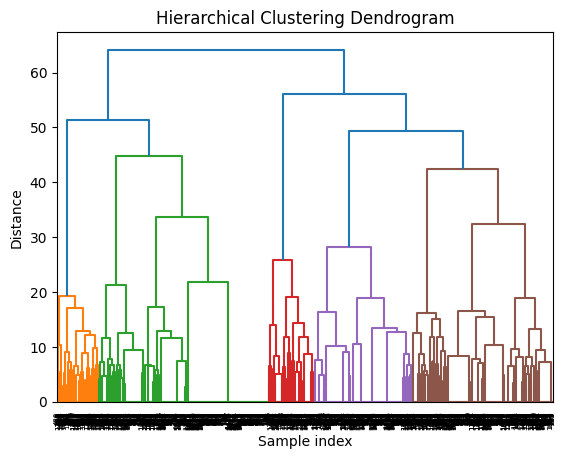

In [12]:
# Compute the distance matrix
distance_matrix = pdist(MD_x_scaled, metric='euclidean')

# Perform hierarchical clustering
linkage_matrix = linkage(distance_matrix, method='ward')
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

#9. Regression with Clustering

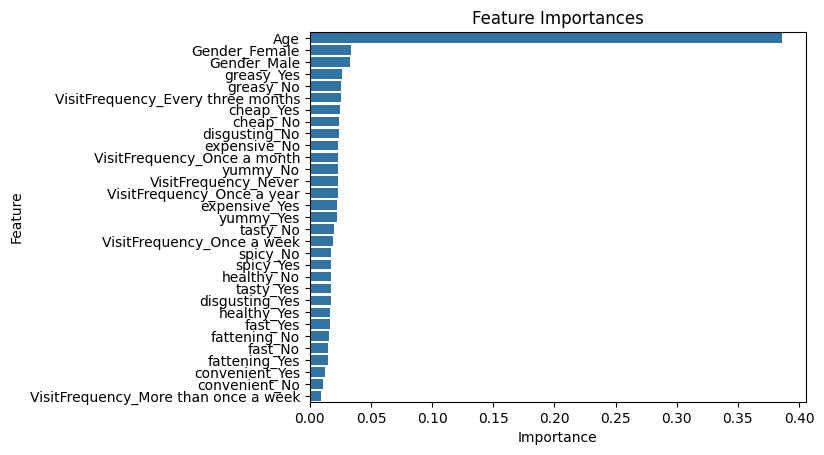

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Convert 'Like' into numerical values
mcdonalds['Like_n'] = 6 - mcdonalds['Like'].astype('category').cat.codes

# Drop 'Like' and 'Like_n' for feature matrix X
X = mcdonalds.drop(['Like', 'Like_n'], axis=1)

# Convert categorical variables to dummy/one-hot encoded variables
X = pd.get_dummies(X)

# Target variable
y = mcdonalds['Like_n']

# Fit a RandomForest model to cluster data
rf = RandomForestClassifier()
rf.fit(X, y)

# Feature importance
importances = rf.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances')
plt.show()

#10. Pair plot

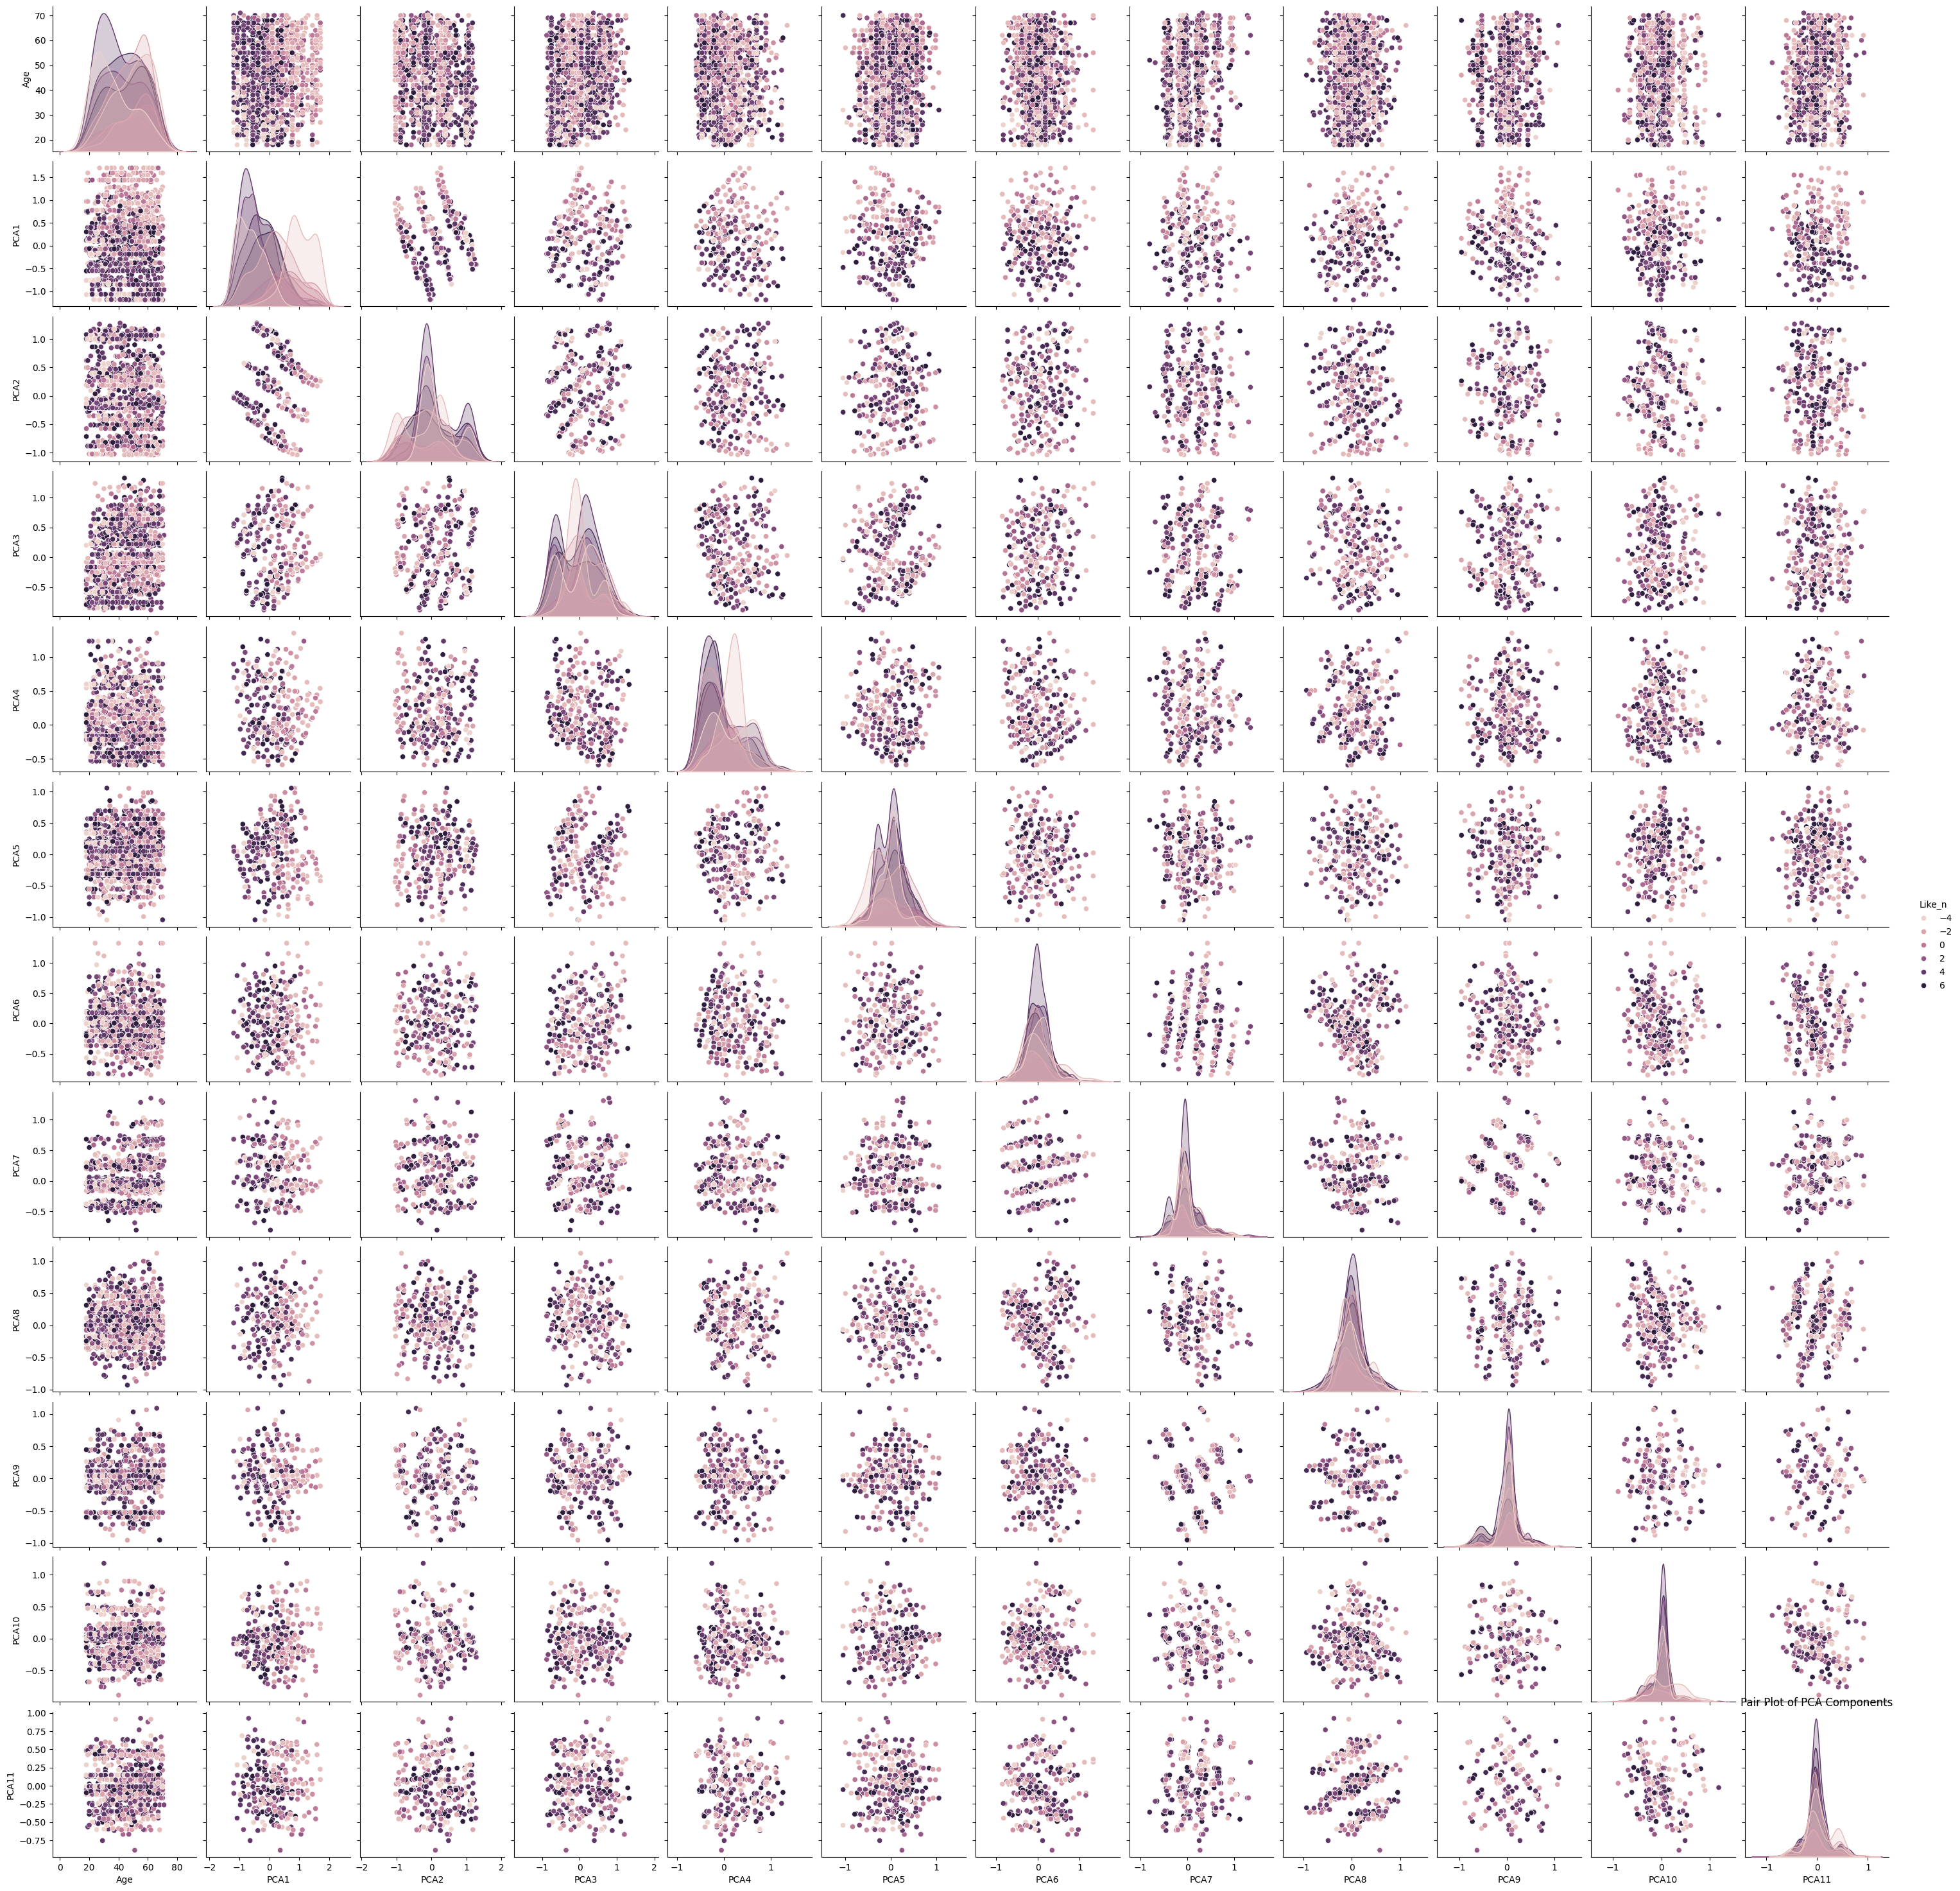

In [14]:
df_pca = mcdonalds.copy()
df_pca = pd.concat([df_pca, pd.DataFrame(data=MD_pca, columns=["PCA1", "PCA2", "PCA3", "PCA4", "PCA5", "PCA6", "PCA7", "PCA8", "PCA9", "PCA10", "PCA11"])], axis=1)
sns.pairplot(df_pca, hue='Like_n')
plt.title('Pair Plot of PCA Components')
plt.show()

#11. Heat Map

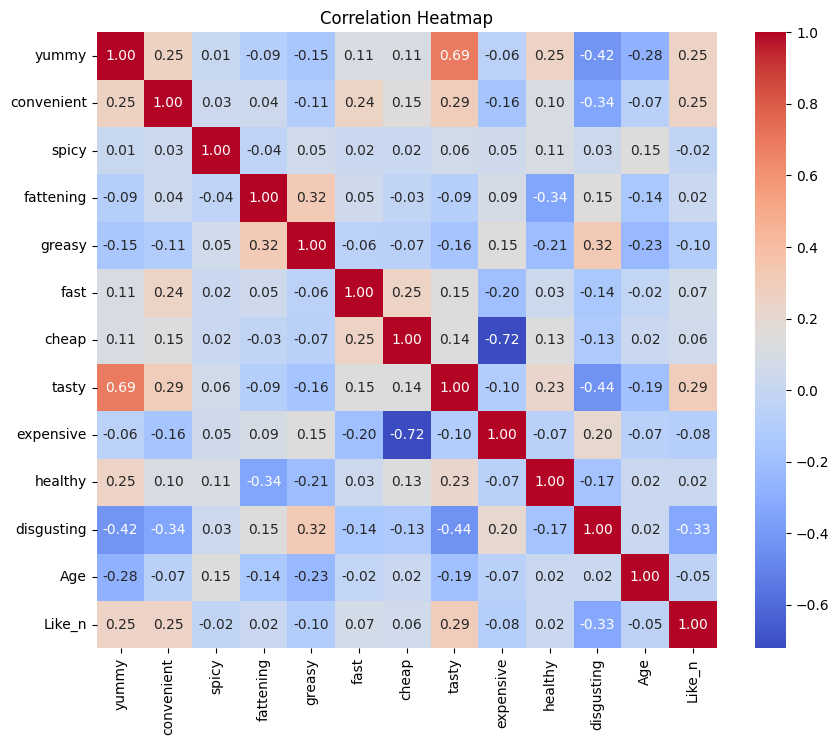

In [15]:
# Convert categorical columns to numeric (if not already done)
categorical_columns = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']
for col in categorical_columns:
    mcdonalds[col] = mcdonalds[col].replace({'Yes': 1, 'No': 0})

# Drop non-numeric columns (if necessary)
mcdonalds = mcdonalds.select_dtypes(include=[np.number])
# Calculate the correlation matrix
correlation_matrix = mcdonalds.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


#12. Box plot

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Like_n', y='yummy', data=mcdonalds)
plt.title('Box Plot: Yummy vs Like_n')
plt.show()
